In [1]:
# This is just to enable improting the generated SDK from the examples folder in the pygen repository
import sys

from tests.constants import REPO_ROOT

sys.path.append(str(REPO_ROOT / "examples"))

# Working with Time Series

To demonstrate working with time series, we have a data model with one view matching exactly the container, named `ScenarioInstance`. The view is illustrated below with a few of the rows with data and listing data types in parenthesis of the column headers.

|     | aggregation (String) | country (String) | instance (Timestamp)      | market (String) | priceArea (String) | priceForecast (TimeSeries)                                      | scenario (String) | start (Timestamp)         |
|----:|:---------------------|:-----------------|:--------------------------|:----------------|:-------------------|:----------------------------------------------------------------|:------------------|:--------------------------|
|   0 |                      | Norway           | 2023-09-06 22:00:00+00:00 | Day-ahead       | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario1 | scenario1         | 2023-09-20 22:00:00+00:00 |
|   1 |                      | Norway           | 2023-09-06 22:00:00+00:00 | Day-ahead       | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario2 | scenario2         | 2023-09-20 22:00:00+00:00 |
|   2 |                      | Norway           | 2023-09-06 22:00:00+00:00 | Day-ahead       | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario3 | scenario3         | 2023-09-20 22:00:00+00:00 |
|   3 | mean                 | Norway           | 2023-09-06 22:00:00+00:00 |                 | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:mean      |                   | 2023-09-20 22:00:00+00:00 |
|   4 | median               | Norway           | 2023-09-06 22:00:00+00:00 |                 | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:median    |                   | 2023-09-20 22:00:00+00:00 |
|   5 | 10.0%                | Norway           | 2023-09-06 22:00:00+00:00 |                 | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:10.0%     |                   | 2023-09-20 22:00:00+00:00 |
|   6 | 90.0%                | Norway           | 2023-09-06 22:00:00+00:00 |                 | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:90.0%     |                   | 2023-09-20 22:00:00+00:00 |
|   7 |                      | Norway           | 2023-09-07 22:00:00+00:00 | Day-ahead       | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-08:scenario1 | scenario1         | 2023-09-20 22:00:00+00:00 |
|   8 |                      | Norway           | 2023-09-07 22:00:00+00:00 | Day-ahead       | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-08:scenario2 | scenario2         | 2023-09-20 22:00:00+00:00 |
|   9 |                      | Norway           | 2023-09-07 22:00:00+00:00 | Day-ahead       | NO1                | scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-08:scenario3 | scenario3         | 2023-09-20 22:00:00+00:00 |
| ... | ...                  | ...              | ...                       | ...             | ...                | ...                                                             | ...               | ...                       |


The same data model shown in Cognite Data Fusion interface:

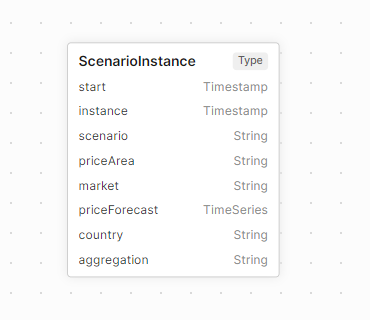


We note that we have one `TimeSeries` field `priceForecast` along with 7 different fields of type `String` or `Timestamp`. The goal of this exmaple is to show how we can filter on the 7 different `Sting` and `Timestamp` types to select 
which `priceForecast` timeseries to retrive, in addition, to aggregation on the time series datapoints directly. 


First, we have to generate an SDK for the `ScenarioInstance` model. The call below shows a truncated version of the call used to generate the SDK.

```bash
pygen generate --client-name ScenarioInstanceClient --to-level-package scenario_instance.client
```

Note that you can use any of the methods for generating the SDK as described in see the [QuickStart guides](../quickstart/cdf_notebook.html).

Second, we have setup a `config.toml`in the current working directory with credentials to connect to Cognite Data Fusion


In [2]:
from scenario_instance.client import ScenarioInstanceClient

In [3]:
scenario = ScenarioInstanceClient.from_toml("config.toml")

## Listing timeseries

We can list a filtered version of the timeseries using the `.price_forecast.list()` method

In [4]:
from IPython.display import display

In [5]:
timeseries = scenario.scenario_instance.price_forecast.list(country="Norway", market="aFRR", limit=10)
timeseries

,id,external_id,name,is_string,metadata,is_step,security_categories,data_set_id,created_time,last_updated_time
0,4832145216682444,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario1 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
1,2842984978245990,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario2 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
2,4407905781277132,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario3 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
3,569669168667745,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario1 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
4,6038443942604884,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario2 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
5,1394105247980751,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario3 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
6,2454885165052490,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario1 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
7,3684494002508782,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario2 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
8,6681002994595602,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario3 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162
9,2037335729671653,scenario_instance:NO1:aFRR:2023-09-21:2023-09-...,"Start=2023-09-21, Scenario=scenario1 Instance=...",False,{'external_id': 'scenario_instance:NO1:aFRR:20...,False,[],6349832762881935,2023-09-23 07:51:53.162,2023-09-23 07:51:53.162


In [6]:
display(type(timeseries))

cognite.client.data_classes.time_series.TimeSeriesList

The return type of the `.list()` is the a `TimeSeriesList` which comes from the `cognite-sdk`. This should be very familiar to anyone that has worked with `cognite-sdk`.  


## Retriving Data Points

In [7]:
datapoints = scenario.scenario_instance.price_forecast(limit=3).retrieve(limit=10)

In [8]:
display(type(datapoints))

cognite.client.data_classes.datapoints.DatapointsList

In [9]:
datapoints

,scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario1,scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario2,scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario3
2023-09-20 22:00:00,42.543824,27.207645,31.197757
2023-09-20 23:00:00,55.624989,96.500942,0.050365
2023-09-21 00:00:00,15.630149,39.455775,91.376742
2023-09-21 01:00:00,71.333070,31.782909,17.870387
2023-09-21 02:00:00,99.345092,36.165970,62.339971
2023-09-21 03:00:00,25.707452,15.599195,43.319833
2023-09-21 04:00:00,4.652626,73.245242,98.953178
2023-09-21 05:00:00,11.471650,29.088107,57.111580
2023-09-21 06:00:00,92.869446,75.556476,97.155684
2023-09-21 07:00:00,81.005675,69.170392,30.144841


### Call Expaination

The structure of the calls `scenario.scenario_instance.price_forecast(limit=3).retrieve(limit=10)` requires some extra expaination. 

* The first call `price_forecast(limit=3)` determines how many time series to retrieve. This also support filtering on the timeseries you want.
* The second call `retrieve(limit=10)` determines how many datapoints for each of those time series to retrieve. This supports `aggregation` on the datapoints.

For the user used with working with time series using the regulare `cognite-sdk` (`pip install cognite-sdk`) the second call should feel familiar. This is the same call the 
`time_series.data.retrieve(...)` with the expection of the parameters `external_id` and `id`. 

```python
from cognite.client import CogniteClient

client = CogniteClient

client.time_series.data.retrieve(...)
```

The `retrieve()` method is not the only one available in addition, we have

* `scenario.scenario_instance.price_forecast(...).retrieve_arrays(...)` 
* `scenario.scenario_instance.price_forecast(...).retrieve_dataframe(...)`
* `scenario.scenario_instance.price_forecast(...).retrieve_dataframe_in_tz(... )`
* `scenario.scenario_instance.price_forecast(...).retrieve_latest(... )`

## Retrieving <code>numpy</code> Arrays

In [10]:
arrays = scenario.scenario_instance.price_forecast(price_area=["NO3", "NO4"], limit=5).retrieve_arrays(
    aggregates="average", granularity="1d"
)

In [11]:
display(type(arrays))

cognite.client.data_classes.datapoints.DatapointsArrayList

In [12]:
arrays

,scenario_instance:NO3:Day-ahead:2023-09-21:2023-09-07:scenario1|average,scenario_instance:NO3:Day-ahead:2023-09-21:2023-09-07:scenario2|average,scenario_instance:NO3:Day-ahead:2023-09-21:2023-09-07:scenario3|average,scenario_instance:NO3:Day-ahead:2023-09-21:2023-09-07:mean|average,scenario_instance:NO3:Day-ahead:2023-09-21:2023-09-07:median|average
2023-09-20,75.385699,28.039528,74.362605,59.262611,61.950719
2023-09-21,45.627034,62.004966,44.981899,50.871300,52.136876
2023-09-22,50.325700,51.383441,52.060273,51.256471,50.053884
2023-09-23,46.347317,44.527587,55.743623,48.872842,44.530589
2023-09-24,53.093665,51.865321,49.623680,51.527555,52.892066
2023-09-25,46.794225,46.544662,49.583434,47.640774,44.427251
2023-09-26,41.335499,50.434179,52.398554,48.056077,45.539188
2023-09-27,40.105992,41.702423,57.219620,46.342678,48.503055
2023-09-28,54.425058,49.379999,43.135727,48.980261,47.193315
2023-09-29,43.364598,47.735155,55.399180,48.832978,51.463123


## Retrieving <code>pandas</code> DataFrame

In [13]:
df = scenario.scenario_instance.price_forecast(market="Day-ahead", limit=2).retrieve_dataframe(
    aggregates=["min", "max"], granularity="24h"
)

In [14]:
df

,scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario1|max,scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario1|min,scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario2|max,scenario_instance:NO1:Day-ahead:2023-09-21:2023-09-07:scenario2|min
2023-09-20,55.624989,42.543824,96.500942,27.207645
2023-09-21,99.345092,4.652626,89.441207,4.426355
2023-09-22,99.415418,2.037122,97.656625,2.901820
2023-09-23,93.461132,1.608159,97.496490,4.474315
2023-09-24,94.171674,1.186893,98.868153,5.995688
2023-09-25,99.997854,0.357046,94.343803,1.731561
2023-09-26,98.949963,3.199264,99.479757,1.652422
2023-09-27,98.304577,7.755338,85.796875,3.163772
2023-09-28,94.585949,8.642713,93.516244,10.008496
2023-09-29,96.184824,4.643276,82.614607,0.014620


When retrieving a `pandas` DataFrame, the generated SDK supports renaming the column names based on any of the other fields in the view. 

In the call beolw, we filter on all the other properties except `priceArea` and use `priceArea` as the name of the columns instead of the `externaId` of the time series

In [15]:
from datetime import datetime

In [16]:
df = scenario.scenario_instance.price_forecast(
    min_instance=datetime(2023, 9, 10),
    max_instance=datetime(2023, 9, 11),
    min_start=datetime(2023, 9, 23),
    max_start=datetime(2023, 9, 24),
    market="Day-ahead",
    country="Norway",
    scenario="scenario1",
    limit=10,
).retrieve_dataframe(aggregates="average", granularity="1d", column_names="priceArea")
df

,NO1|average,NO2|average,NO3|average,NO4|average,NO5|average
2023-09-23,74.319249,38.464454,38.739823,57.307569,87.068250
2023-09-24,39.536642,53.456107,55.716532,55.300441,53.322534


## Retrieving <code>pandas</code> DataFrame in Time Zone

In [17]:
from datetime import datetime
from zoneinfo import ZoneInfo

In [18]:
tz = ZoneInfo("Europe/Oslo")
start = datetime(2023, 9, 21, tzinfo=tz)
end = datetime(2023, 9, 28, tzinfo=tz)

In [19]:
df = scenario.scenario_instance.price_forecast(market="aFRR", price_area="NO1", limit=5).retrieve_dataframe_in_tz(
    start, end, column_names=["country", "start", "instance"]
)
df

,Norway-2023-09-20T22:00:00+00:00-2023-09-06T22:00:00+00:00,Norway-2023-09-20T22:00:00+00:00-2023-09-06T22:00:00+00:00,Norway-2023-09-20T22:00:00+00:00-2023-09-06T22:00:00+00:00,Norway-2023-09-20T22:00:00+00:00-2023-09-07T22:00:00+00:00,Norway-2023-09-20T22:00:00+00:00-2023-09-07T22:00:00+00:00
2023-09-21 00:00:00+02:00,96.220590,4.233595,90.719355,35.895511,67.443442
2023-09-21 01:00:00+02:00,37.061390,36.993029,79.280685,19.698027,18.294888
2023-09-21 02:00:00+02:00,83.328886,47.436170,62.418286,60.251462,4.031537
2023-09-21 03:00:00+02:00,49.851274,71.629861,16.740850,12.069461,15.655898
2023-09-21 04:00:00+02:00,30.740467,8.858023,63.957445,64.822675,74.852698
...,...,...,...,...,...
2023-09-27 19:00:00+02:00,68.540734,6.767874,60.454826,44.445546,48.901137
2023-09-27 20:00:00+02:00,1.515058,71.533502,89.763187,63.990720,11.769747
2023-09-27 21:00:00+02:00,60.200468,35.729739,90.471403,30.544108,39.151853
2023-09-27 22:00:00+02:00,47.006708,82.180196,91.541581,63.358762,14.273487


## Retriving Latest

In [20]:
datapoints = scenario.scenario_instance.price_forecast(market="aFRR", price_area="NO1", limit=5).retrieve_latest()
datapoints

,scenario_instance:NO1:aFRR:2023-09-21:2023-09-07:scenario1,scenario_instance:NO1:aFRR:2023-09-21:2023-09-07:scenario2,scenario_instance:NO1:aFRR:2023-09-21:2023-09-07:scenario3,scenario_instance:NO1:aFRR:2023-09-21:2023-09-08:scenario1,scenario_instance:NO1:aFRR:2023-09-21:2023-09-08:scenario2
2023-09-24 11:00:00,85.714107,6.104835,22.758304,17.549131,57.479033


In [21]:
display(type(datapoints))

cognite.client.data_classes.datapoints.DatapointsList

## Plotting Timeseries

`pandas` has built in plotting and thus just chose a retrive methods that returns a `pandas` DataFrame and call `.plot()` on it.

In [22]:
tz = ZoneInfo("Europe/Oslo")
start = datetime(2023, 9, 21, tzinfo=tz)
end = datetime(2023, 9, 28, tzinfo=tz)

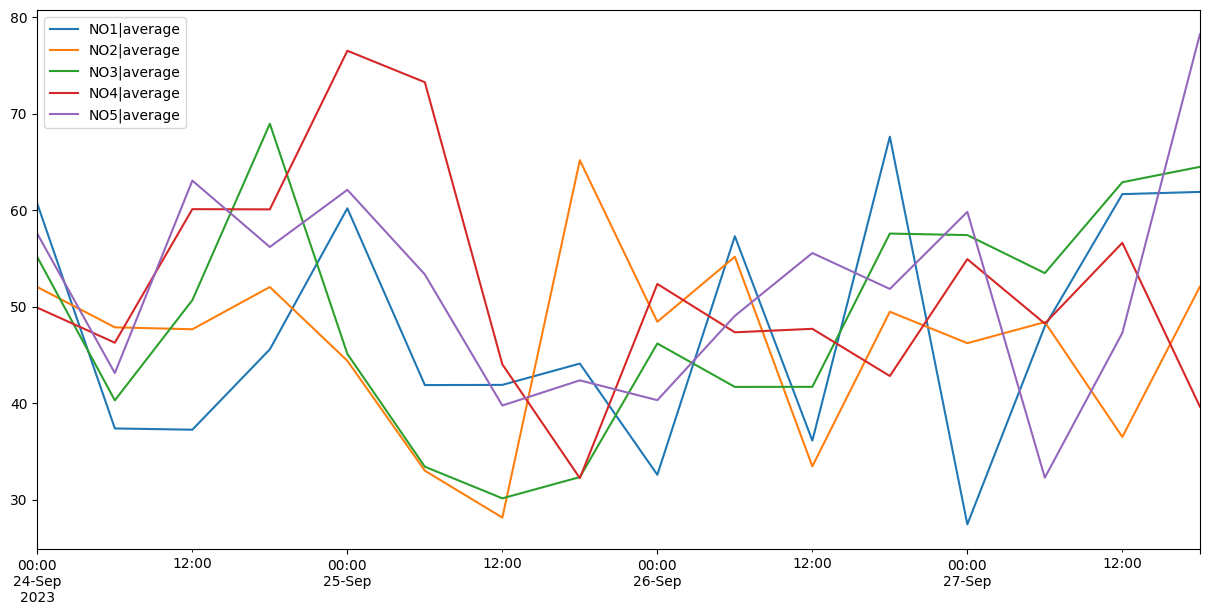

In [23]:
df = scenario.scenario_instance.price_forecast(
    min_instance=datetime(2023, 9, 10),
    max_instance=datetime(2023, 9, 11),
    min_start=datetime(2023, 9, 23),
    max_start=datetime(2023, 9, 24),
    market="Day-ahead",
    country="Norway",
    scenario="scenario1",
    limit=10,
).retrieve_dataframe_in_tz(start, end, aggregates="average", granularity="6h", column_names="priceArea")
df.plot(figsize=(15, 7));